In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup


In [24]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
from overlap import compute_schmidt_full

def compute_schmidt_2(result,idx,s=1):
    if s==1:
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        a = np.squeeze(a)
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 2 on system 1
        b=np.squeeze(b)
        g = np.outer(a, b).flatten()
        g=np.squeeze(g)
    elif s==2:
        a = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 1 on system 1
        a = np.squeeze(a)
        b = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 1
        b=np.squeeze(b)
        g = np.outer(a, b).flatten()
        g=np.squeeze(g)
    return g

def update_plot(frames):
    # Clear previous plot
    plt.clf()
    
    #print(frames)
    state = compute_schmidt_2(result,frames,1)
    state2 = compute_schmidt_2(result,frames,2)
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff);
    plt.plot(eigenenergies_total,energy_coeff2);
    plt.title(f"Plot of the probability that Schmidt1 and 2 are in the energy eigenstates for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.ylim(0, 0.25)

def update_plot1(frames):
    # Clear previous plot
    plt.clf()
    
    #print(frames)
    state = compute_schmidt_2(result,frames,1)
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff);
    plt.title(f"Plot of the probability that Schmidt1 be in energy eigenstates for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.ylim(0, 0.25)
    
def update_plot2(frames):
    # Clear previous plot
    plt.clf()
    
    #print(frames)
    state2 = compute_schmidt_2(result,frames,2)
    energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff2);
    plt.title(f"Plot of the probability that Schmidt 2 be in an energy eigenstates")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.ylim(0, 0.25)

def make_gif_distribs1s2(EI,w):#H_total,result,EI

    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot, frames=100, interval=100)

    # Save the animation as a GIF
    ani.save(f'distrib_schmidt1_2_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')

def make_gif_distribs1(EI,w):
    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot1, frames=100, interval=100)
    
    # Save the animation as a GIF
    ani.save(f'distrib_schmidt1_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')

def make_gif_distribs2(EI,w):
    
    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot2, frames=100, interval=100)
    
    # Save the animation as a GIF
    ani.save(f'distrib_schmidt2_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')


In [3]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


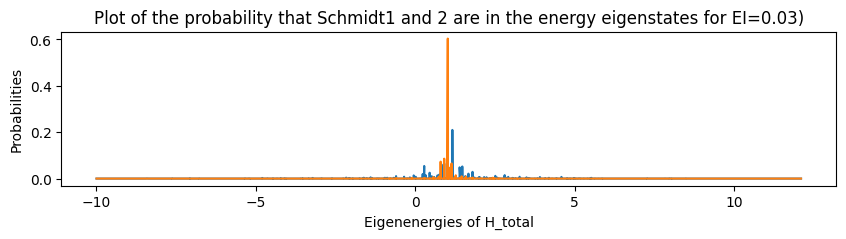

In [4]:

make_gif_distribs1s2(EI,w)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


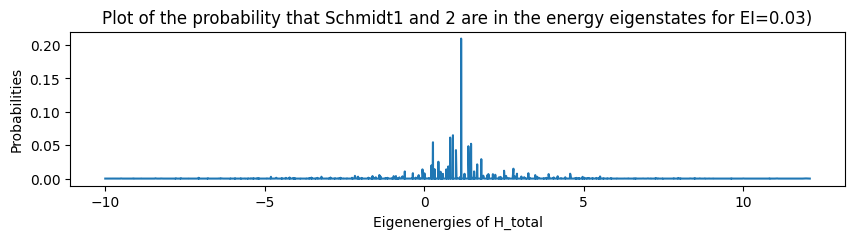

In [5]:
make_gif_distribs1(EI,w)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


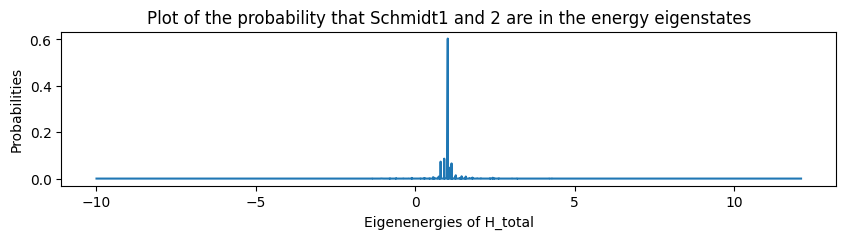

In [6]:
make_gif_distribs2(EI,w)

In [7]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


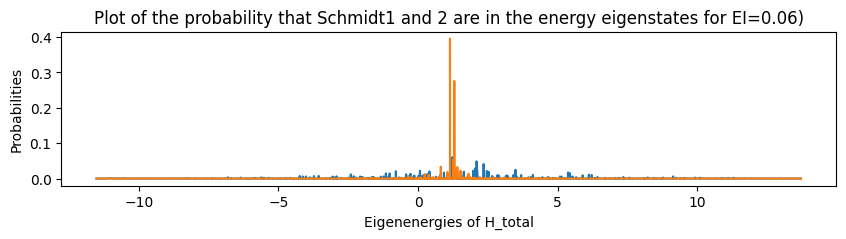

In [8]:

make_gif_distribs1s2(EI,w)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


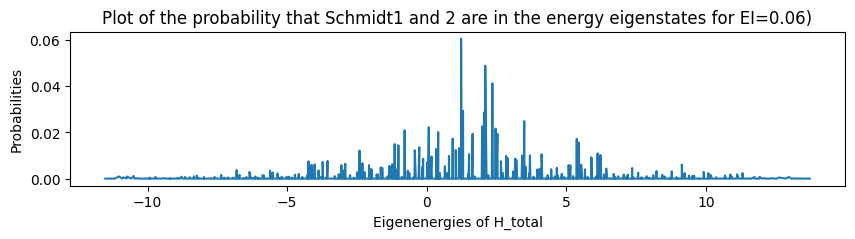

In [9]:
make_gif_distribs1(EI,w)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


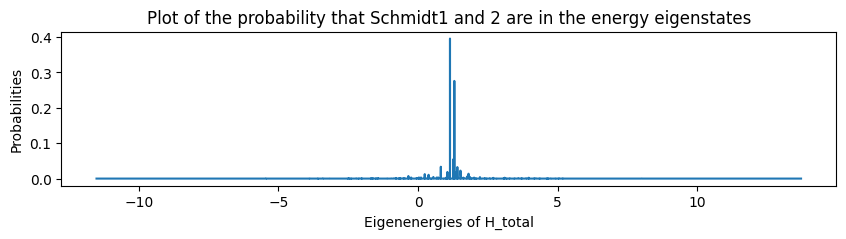

In [10]:
make_gif_distribs2(EI,w)

In [11]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.1
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


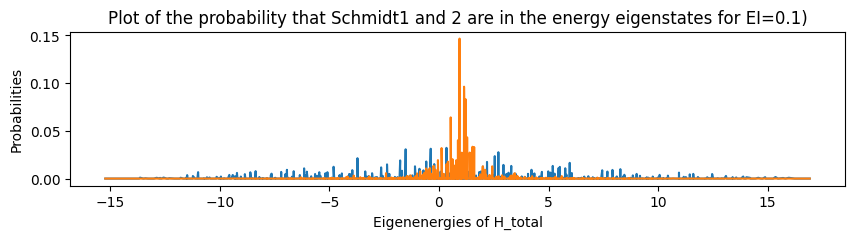

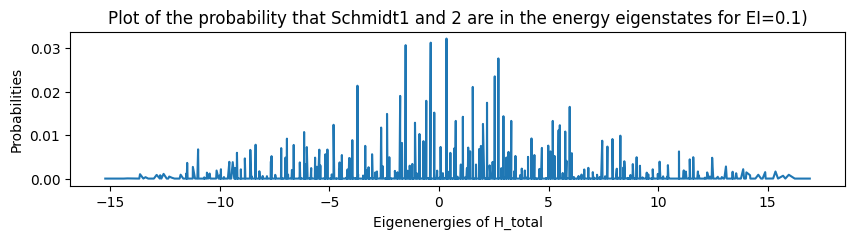

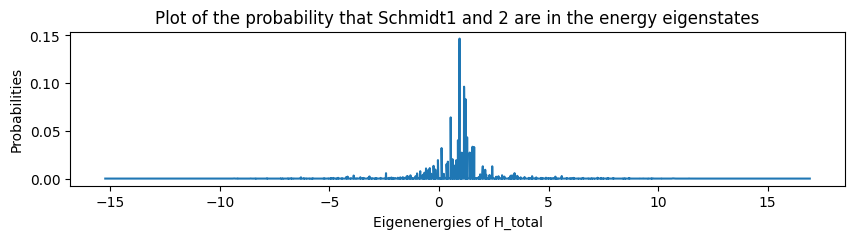

In [12]:
make_gif_distribs1s2(EI,w)
make_gif_distribs1(EI,w)
make_gif_distribs2(EI,w)

In [13]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.15
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


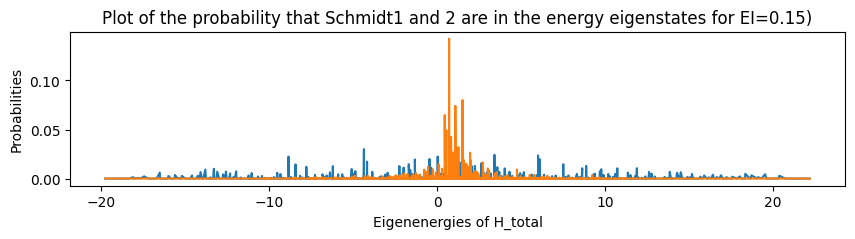

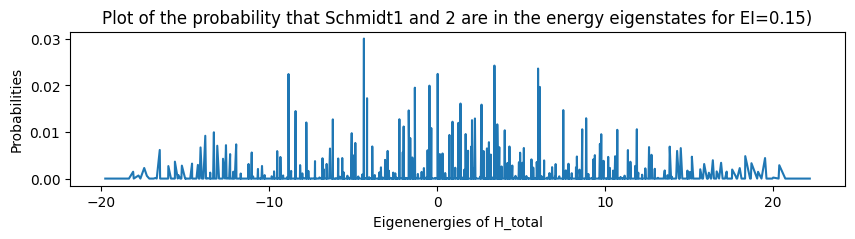

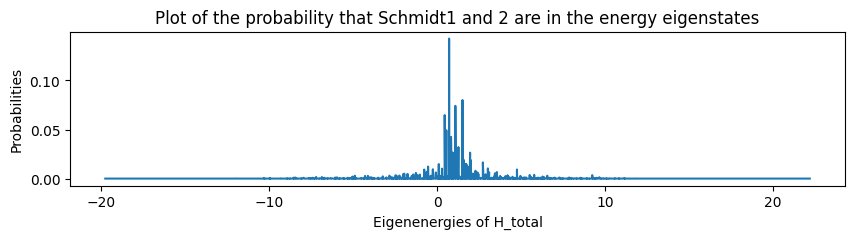

In [14]:
make_gif_distribs1s2(EI,w)
make_gif_distribs1(EI,w)
make_gif_distribs2(EI,w)

In [15]:
####Now we change w

In [25]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.5# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

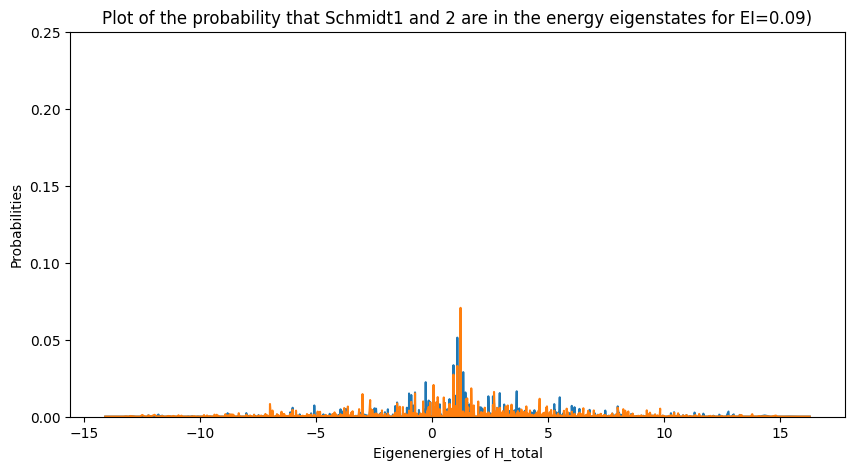

In [26]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [27]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.4# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

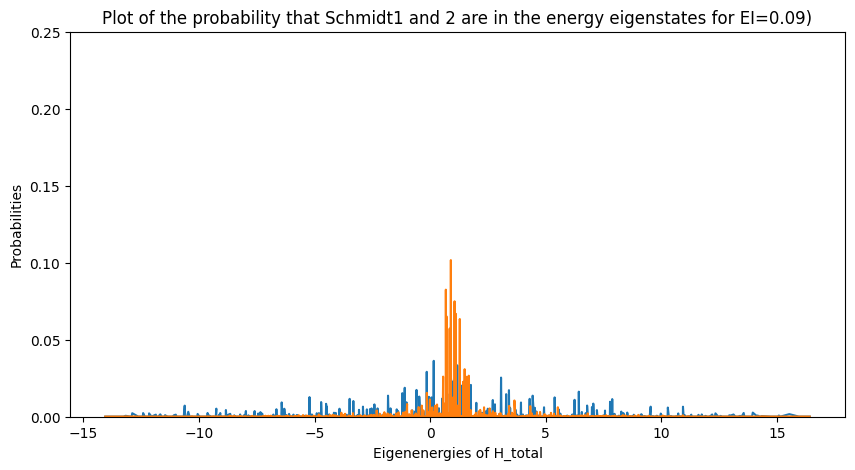

In [28]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [30]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

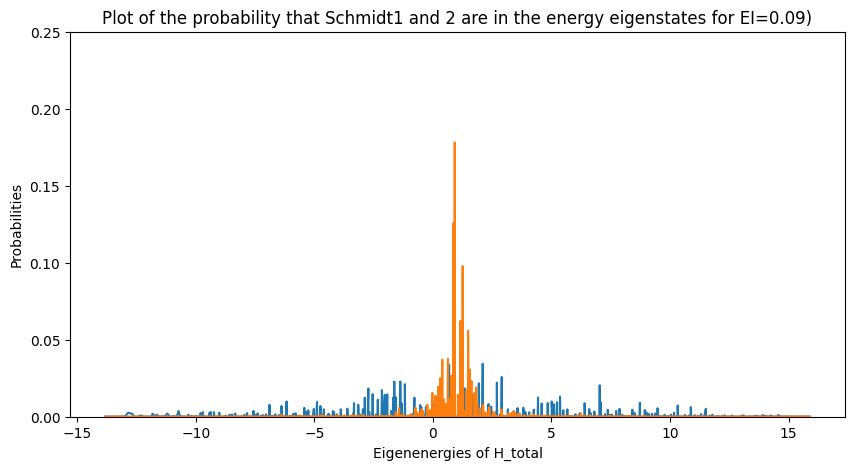

In [31]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [32]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.2# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

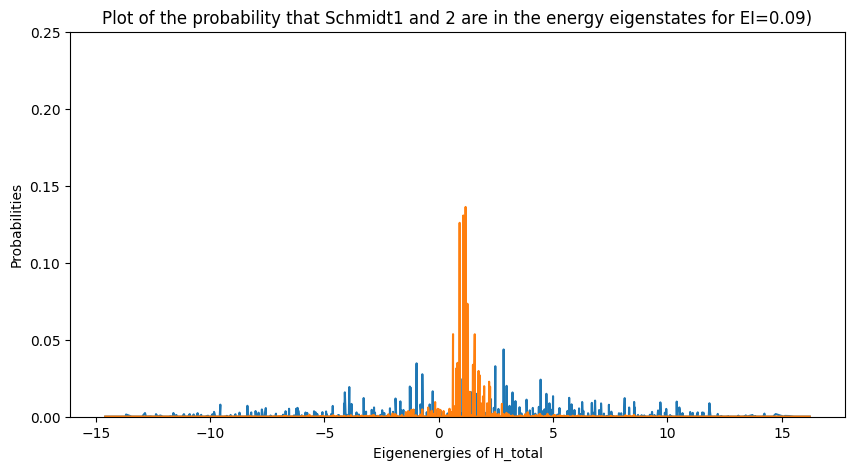

In [33]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)